In [16]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def genkgrid(filename): 
    with h5py.File(filename,'r') as f: 
        kx=np.array(f["DMF2RG/SelfEnergy/k_grid_x"])
        ky=np.array(f["DMF2RG/SelfEnergy/k_grid_y"])
        occ= f["Parameters/dmft_filling"][0]
        tpri=f["Parameters/tp"][0]
        
    with open("../data/k_grid_tpri_"+str(tpri)+"_occ_"+str(occ)+".dat",'w') as f: 
        for i in range(len(kx)): 
            f.write(str(kx[i])+"\t"+str(ky[i])+"\n")
    print "end"
def readself(filename):
    with h5py.File(filename,'r') as f: 
        se = np.array(f["DMF2RG/SelfEnergy/Re"])+1j*np.array(f["DMF2RG/SelfEnergy/Im"])
    print (se.shape)
    for j in range(se.shape[0]):
        plt.plot(se[j,:].imag,'-o')
    return
    with open("../data/self_Fock.dat",'w') as f: 
        for i in range(se.shape[1]):
            for j in range(se.shape[0]): 
                f.write(str(se[j][i].real)+"\t"+str(se[j][i].imag) + "\t")
            f.write('\n')
    

(44, 40)


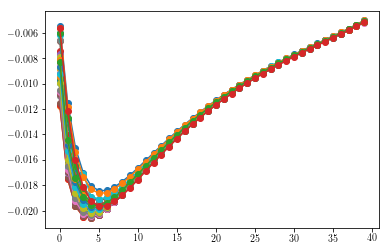

In [21]:
readself('/home/taranto/Documents/dmf2rg_simple/data/Fock/execution_fill0.991/data/dat-last-step.h5')